In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.layers import Dense, Dropout
from matplotlib.pyplot import imshow
%matplotlib inline
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense
print (keras.__version__)
from sklearn.preprocessing import MinMaxScaler
import keras
import pandas
from PIL import Image
from matplotlib.pyplot import imshow
from keras import utils as np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

2023-08-27 16:15:13.267909: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-27 16:15:13.589012: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-27 16:15:13.591028: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-27 16:15:15.044304: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


#  Chargement des jeux de données

In [3]:
from keras.datasets import mnist

In [4]:
(images_entrainement,labels_entrainement),(images_test,labels_test)=mnist.load_data()

In [5]:
images_entrainement.shape

(60000, 28, 28)

In [7]:
labels_entrainement.shape

(60000,)

In [8]:
images_test.shape

(10000, 28, 28)

In [9]:
labels_test.shape

(10000,)

# Préparation des données

In [11]:
# Nous allons choisir arbitrairement des catégories de chiffres pour déveloper un modele d'apprentissage
# capable de les identifiers.
# Cela correspond à effectuer une classification multiclasses types 4 classes
# Le code ci-dessous isolent tous les 3 et 6 et 8 et 9 et les stock dans deux nouvelles variables  


images_entrainement_new, labels_entrainement_new = images_entrainement[(labels_entrainement==3) | (labels_entrainement==6) | (labels_entrainement==8) | (labels_entrainement==9) ],\
labels_entrainement[(labels_entrainement==3) | (labels_entrainement==6) | (labels_entrainement==8) |  (labels_entrainement==9) ]



In [13]:
images_entrainement_new.shape

(23849, 28, 28)

In [12]:
# Meme opérations pour les données de test

images_test_new, labels_test_new = images_test[(labels_test==3) | (labels_test==6) | (labels_test==8) | (labels_test==9) ],\
labels_test[(labels_test==3) | (labels_test==6) | (labels_test==8) |  (labels_test==9) ]



In [15]:
images_test_new.shape

(3951, 28, 28)

In [16]:
# Données d'entrainement:
# Normalisation

images_entrainement_final = images_entrainement_new.reshape(23849, 784)
images_entrainement_final = images_entrainement_final.astype('float32')/255


In [17]:
# Données de test:
# Normalisation 

images_test_final = images_test_new.reshape(3951, 784)
images_test_final = images_test_final.astype('float32')/255


In [18]:
images_entrainement_final.shape

(23849, 784)

In [19]:
images_test_final.shape

(3951, 784)

In [20]:
# Données d'entrainement 

# Encodage des étiquettes
from sklearn import preprocessing
import tensorflow as tf

# Encodage des etiquettes afin qu'elles soit utilisable par le réseau de neurones
le = preprocessing.LabelEncoder()

# Encodage des chiffres
labels_entrainement_new_fit=le.fit_transform(labels_entrainement_new)
catego_labels_entrainement_new=tf.keras.utils.to_categorical(labels_entrainement_new_fit,num_classes=4,dtype='float32')


In [21]:
# Données de test

# Encodage des étiquettes
from sklearn import preprocessing
import tensorflow as tf

# Encodage des etiquettes afin qu'elles soit utilisable par le réseau de neurones
le = preprocessing.LabelEncoder()

# Encodage des chiffres.
labels_test_new_fit=le.fit_transform(labels_test_new)
catego_labels_test_new=tf.keras.utils.to_categorical(labels_test_new_fit,num_classes=4,dtype='float32')


# Architecture de reseau

In [23]:


model = Sequential([
   Dense(16, activation='relu', input_shape=(784,)),
   Dropout(rate=0.05),
   Dense(16, activation='relu'),
   Dropout(rate=0.05),
   Dense(16, activation='relu'),
   Dense(4, activation='softmax')
])


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                12560     
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 4)                 68        
                                                                 
Total params: 13,172
Trainable params: 13,172
Non-trai

# Compilation du modele

In [26]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrainement du modele

In [27]:

history=model.fit(
  x=images_entrainement_final,
  y=catego_labels_entrainement_new,
  shuffle=True,
  epochs=3,
  batch_size=64,
  validation_split=0.3
)


Epoch 1/3


2023-08-27 16:34:21.118442: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 52352384 exceeds 10% of free system memory.


249/261 [===========================>..] - ETA: 0s - loss: 0.4855 - accuracy: 0.8114

2023-08-27 16:34:23.627812: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22438080 exceeds 10% of free system memory.


261/261 [==============================] - 3s 6ms/step - loss: 0.4729 - accuracy: 0.8168 - val_loss: 0.1518 - val_accuracy: 0.9551
Epoch 2/3
261/261 [==============================] - 2s 7ms/step - loss: 0.1645 - accuracy: 0.9515 - val_loss: 0.1183 - val_accuracy: 0.9665
Epoch 3/3
261/261 [==============================] - 1s 4ms/step - loss: 0.1230 - accuracy: 0.9634 - val_loss: 0.0969 - val_accuracy: 0.9701


In [28]:
# Pour faire une évaluation

evaluation = model.evaluate(images_test_final, catego_labels_test_new)


124/124 [==============================] - 0s 2ms/step - loss: 0.0952 - accuracy: 0.9696


# Tracé des courbes

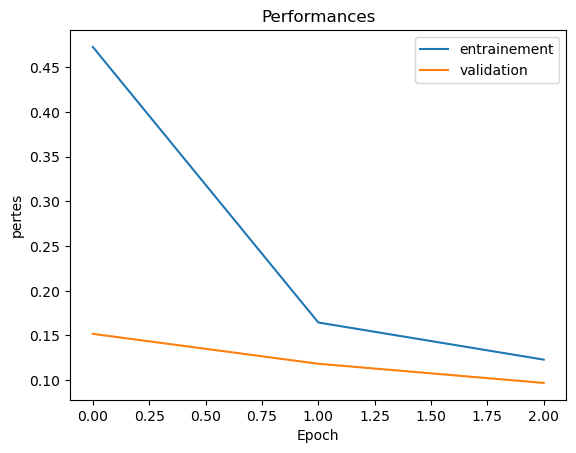

In [29]:
# Affichage des pertes

from matplotlib import pyplot

pyplot.title('Performances')
pyplot.xlabel('Epoch')
pyplot.ylabel('pertes')
pyplot.plot(history.history['loss'], label='entrainement')
pyplot.plot(history.history['val_loss'], label='validation')


pyplot.legend()
pyplot.show()

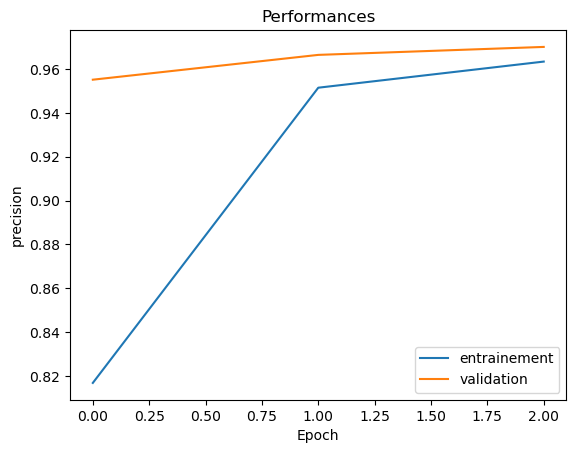

In [30]:
# Affichage de la précision

from matplotlib import pyplot

pyplot.title('Performances')
pyplot.xlabel('Epoch')
pyplot.ylabel('precision')
pyplot.plot(history.history['accuracy'], label='entrainement')
pyplot.plot(history.history['val_accuracy'], label='validation')

pyplot.legend()
pyplot.show()


# Sauvegarde du modele

In [31]:

# Sauvegarde du modele


model.save(r'./classification_4_classes_Keras.hdf5')


In [32]:
# Pour faire des prédictions

predictions = model.predict(images_test_final,
                            batch_size=10,
                            verbose=0) 


In [33]:
# Keras nous propose une autre méthode intéressante,
# qui peut être utilisée pour prédire les valeurs de nouvelles données 
# (données que le réseau n'a pas encore vues). 
# Comme nous n'avons pas séparé auparavant un tel ensemble,
# mais seulement divisé l'ensemble MNIST en données d'apprentissage et de test,
# nous n'utiliserons qu'un sous-ensemble des données de test.
# La méthode renverra un tableau de bord de 100 éléments.
# Chaque élément indiquera les probabilités que l'entrée appartienne à une classe donnée.


predictions = model.predict(images_test_final[0:100])


4/4 [==============================] - 0s 3ms/step


In [34]:
#  pour voir la prédiction 
# la plupart des valeurs sont de très petits nombres 
# (très faible probabilité que l'image appartienne à cette classe)
# 

predictions[0]


array([1.2452679e-03, 1.6046206e-04, 2.6159650e-03, 9.9597830e-01],
      dtype=float32)

In [35]:
np.argmax(predictions[1])

3

In [37]:
labels_test_new[1]

9

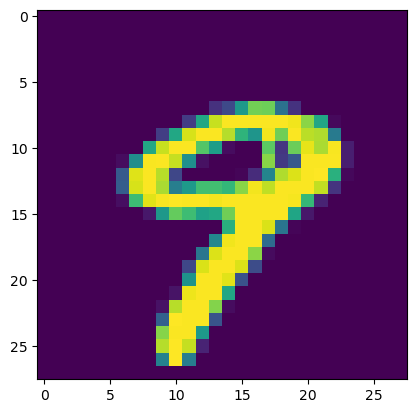

In [38]:
# Vérifions à quoi ressemble l'image. 
# Rappelez-vous que les données d'entrée du réseau ont été aplaties 
# dans le but de creer un vecteur d'une longueur de 784.
# Avant de l'afficher, nous devons le reconvertir à la taille de 28 x 28 pixels. 

plt.imshow(images_test_new[1].reshape(28,28))


In [40]:
# nous avons un tableau à deux dimensions, 
# et non à un vecteur comme avec l'utilisation précédente de argmax,
# Dans notre cas, le long de l'axe y, c'est-à-dire axis = 1. 

# le chiffre 0 représente le 5
# le chiffre 1 représente le 6
# le chiffre 2 représente le 8
# le chiffre 3 représente le 9

la_prediction=np.argmax(predictions, axis=1)

In [47]:
# Dans le cadre d une classification 
# pour remplacer des chiffres par d'autres
# le chiffre 5 est labelisé 0
# le chiffre 6 est labelidé 1



labels_test_new_final = np.zeros(la_prediction.shape)
labels_test_new_final[np.where(la_prediction==0.0)[0]] = 3 # remplace le 6 par 1
labels_test_new_final[np.where(la_prediction==1.0)[0]] = 6 # remplace le 5 par 0
labels_test_new_final[np.where(la_prediction==2.0)[0]] = 8
labels_test_new_final[np.where(la_prediction==3.0)[0]] = 9
labels_test = labels_test_new_final

labels_test_prediction = labels_test_new_final.T

print('\n labels_test_prediction =',labels_test_prediction[0:15])


 labels_test_prediction = [9. 9. 6. 9. 9. 3. 9. 6. 6. 3. 3. 3. 6. 3. 6.]


In [48]:
labels_test_prediction=labels_test_prediction.astype(np.uint8)

In [49]:
labels_test_prediction[0:100]

array([9, 9, 6, 9, 9, 3, 9, 6, 6, 3, 3, 3, 6, 3, 6, 9, 8, 9, 3, 6, 3, 9,
       3, 9, 6, 8, 3, 6, 3, 6, 9, 3, 6, 9, 6, 9, 9, 9, 8, 3, 9, 9, 6, 9,
       8, 6, 6, 8, 6, 6, 3, 8, 9, 8, 6, 3, 6, 6, 3, 8, 8, 8, 8, 9, 3, 8,
       6, 3, 6, 3, 9, 9, 9, 3, 9, 3, 6, 8, 3, 3, 8, 9, 9, 8, 8, 3, 9, 8,
       6, 8, 9, 8, 8, 3, 9, 9, 8, 9, 9, 6], dtype=uint8)

In [50]:
labels_test_new[0:100]

array([9, 9, 6, 9, 9, 3, 9, 6, 6, 3, 3, 3, 6, 3, 6, 9, 8, 9, 3, 6, 3, 9,
       3, 9, 6, 8, 3, 6, 3, 6, 9, 3, 6, 9, 6, 9, 9, 9, 8, 3, 9, 9, 6, 9,
       8, 6, 6, 8, 6, 6, 3, 8, 9, 9, 6, 3, 6, 6, 3, 8, 8, 8, 8, 9, 9, 3,
       6, 3, 6, 3, 9, 9, 9, 3, 9, 3, 6, 8, 3, 3, 8, 8, 9, 9, 8, 3, 9, 8,
       6, 8, 9, 8, 8, 3, 9, 9, 8, 9, 9, 6], dtype=uint8)

In [51]:
# pour verifier ou il y a des erreurs.....si elle existe !

fausse_prediction = np.argmin(np.argmax(predictions, axis=1) == labels_test_new[0:100])
fausse_prediction


0

In [53]:
# Appliquons un softmax, pour obtenir des probabilités
# La somme d une ligne est égale à 1
# La fonction tf.nn.softmax convertit ces logits en probabilités pour chaque classe :
# La première colonne correspond aux probabilités de la classe 0 c'est à dire le premier chiffre
# La seconde colonne correspond aux probabilités de la classe 1 c'est à dire le deuxieme chiffre
# 
# ici la classe 5 est représentée par 0
# ici la classe 6 est représentée par 1




print(tf.nn.softmax(predictions[:10]))

# Methone pour afficher les classes des chiffres
name_classes=[3,6,8,9]
one_hot_encode=pandas.get_dummies(name_classes)
one_hot_encode


tf.Tensor(
[[0.17530666 0.17511658 0.17554712 0.47402963]
 [0.1749588  0.17490715 0.17493473 0.47519916]
 [0.17575775 0.4738135  0.17524618 0.17518255]
 [0.17498273 0.17494346 0.17501742 0.47505632]
 [0.17538632 0.1752281  0.1756834  0.4737022 ]
 [0.3953546  0.18557493 0.23390293 0.18516745]
 [0.17497605 0.17490406 0.17491361 0.47520632]
 [0.17513323 0.47491086 0.1749764  0.17497954]
 [0.17529315 0.47440737 0.17507389 0.17522554]
 [0.4751873  0.17490695 0.17491174 0.17499405]], shape=(10, 4), dtype=float32)


,3,6,8,9
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [54]:
labels = (labels_test_new)[0:30]
print("Prediction: {}".format(tf.argmax(predictions[0:30], axis=1)))
print("    Labels: {}".format(labels))

name_classes=[3,6,8,9]
one_hot_encode=pandas.get_dummies(name_classes)
one_hot_encode


Prediction: [3 3 1 3 3 0 3 1 1 0 0 0 1 0 1 3 2 3 0 1 0 3 0 3 1 2 0 1 0 1]
    Labels: [9 9 6 9 9 3 9 6 6 3 3 3 6 3 6 9 8 9 3 6 3 9 3 9 6 8 3 6 3 6]


,3,6,8,9
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [55]:
# fin **************************************************************************